## Instacart EDA Project 

In this project, we explore the shopping behavior of Instacart customers by analyzing various aspects of their grocery orders. Using a dataset containing information on products, orders, and customer interactions, we aim to uncover key insights about customer preferences, purchasing patterns, and product popularity. Specifically, we’ll focus on questions such as: what are the most popular products, when do customers shop, and what are the common patterns in reorder behavior? By answering these questions, we hope to understand the dynamics of online grocery shopping and gain actionable insights into how customers interact with their shopping carts and make purchasing decisions.

In [93]:
import pandas as pd

In [94]:
instacart_orders_cleaned = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';')

In [95]:
products_cleaned = pd.read_csv('/datasets/products.csv', delimiter=';')

In [96]:
order_products_cleaned = pd.read_csv('/datasets/order_products.csv', delimiter=';')

In [97]:
departments_cleaned = pd.read_csv('/datasets/departments.csv', delimiter=';')

In [98]:
aisles_cleaned = pd.read_csv('/datasets/aisles.csv', delimiter=';')

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [99]:
duplicated_orders = instacart_orders_cleaned[instacart_orders_cleaned.duplicated()] # used dulpicated to check for duplicated orders for instacart_orders_cleaned 

print(f"Number of duplicated rows: {len(duplicated_orders)}") # len to count number of rows

# Check for duplicated orders

Number of duplicated rows: 15


In [100]:
wed_2am_orders = instacart_orders_cleaned[(instacart_orders_cleaned['order_dow'] == 3) & (instacart_orders_cleaned['order_hour_of_day'] == 2)] # assuming that 0 is the indicies for Sunday then 3 is the indicies for Wed, but not sure if it is? 24hr time 2am = 2

print(f"Number of orders placed on Wednesday at 2:00 AM: {len(wed_2am_orders)}") # calculate number of rows

# Check for all orders placed Wednesday at 2:00 AM

Number of orders placed on Wednesday at 2:00 AM: 121


In [101]:
instacart_orders_cleaned = instacart_orders_cleaned.drop_duplicates() # duplicates dropped and assigned back to variable

print(f"Number of rows after dropping duplicate orders: {len(instacart_orders_cleaned)}") # calculate number of rows

# Remove duplicate orders

Number of rows after dropping duplicate orders: 478952


In [102]:
duplicated_orders = instacart_orders_cleaned[instacart_orders_cleaned.duplicated()] # double checking for duplicate values

print(f"Number of duplicated rows after removal: {len(duplicated_orders)}") # calculate number of rows

# Double check for duplicate rows

Number of duplicated rows after removal: 0


In [103]:
duplicated_order_ids = instacart_orders_cleaned[instacart_orders_cleaned.duplicated(subset='order_id')] # check for duplicate values

print(f"Number of duplicated order IDs: {len(duplicated_order_ids)}") # calculate number of rows

# Double check for duplicate order IDs only

Number of duplicated order IDs: 0


Type Markdown and LaTeX:  𝛼2

### `products` data frame

In [104]:
duplicated_products = products_cleaned[products_cleaned.duplicated()] # checking for duplicate values

print(f"Number of fully duplicated rows: {len(duplicated_products)}") # calculate number of rows

# Check for fully duplicate rows

Number of fully duplicated rows: 0


In [105]:
duplicate_product_ids = products_cleaned[products_cleaned.duplicated(subset='product_id')] # checking for duplicate values

print(f"Number of duplicated product IDs: {len(duplicate_product_ids)}") # calculate number of rows

# Check for just duplicate product IDs

Number of duplicated product IDs: 0


In [106]:
products_cleaned['product_name'] = products_cleaned['product_name'].str.lower() #  lowercase version of product names for comparison

duplicate_product_names = products_cleaned[products_cleaned['product_name'].duplicated(keep=False)] # Check for duplicate values

print(f"Number of duplicate product names: {len(duplicate_product_names)}") # calculate number of rows

# Check for just duplicate product names (convert names to lowercase to compare better)
print()

duplicate_product_names.head() # print first few rows to make sure product names are all lower

Number of duplicate product names: 1465



,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
41,42,biotin 1000 mcg,47,11
71,72,NaN,100,21
109,110,NaN,100,21
185,186,fresh scent dishwasher detergent with dawn,74,17


In [107]:
non_missing_duplicate_names = products_cleaned[
    products_cleaned['product_name'].notna() & 
    products_cleaned['product_name'].duplicated(keep=False)
] # Check for duplicate product names that aren't missing

print(f"Number of duplicate product names that aren't missing: {len(non_missing_duplicate_names)}") # print the number of non-missing duplicate product names

print()

print(non_missing_duplicate_names.head())# Display the first few rows of non-missing duplicate product names to make sure

# Check for duplicate product names that aren't missing

Number of duplicate product names that aren't missing: 207

      product_id                                product_name  aisle_id  \
41            42                             biotin 1000 mcg        47   
185          186  fresh scent dishwasher detergent with dawn        74   
515          516                      american cheese slices        21   
1538        1539                            cauliflower head        83   
1783        1784         nutrition protein mix blueberry nut       117   

      department_id  
41               11  
185              17  
515              16  
1538              4  
1783             19  


Type Markdown and LaTeX:  𝛼2

### `order_products` data frame

In [108]:
fully_duplicated_rows = order_products_cleaned[order_products_cleaned.duplicated(keep=False)] # checking for dupicate values keep=false will indicate duplicates as TRUE? I think so but not 100% sure?

print(f"Number of fully duplicated rows: {len(fully_duplicated_rows)}") # calculate number of rows

# Check for fullly duplicate rows

Number of fully duplicated rows: 0


In [109]:
duplicate_order_product_pairs = order_products_cleaned[order_products_cleaned.duplicated(subset=['order_id', 'product_id'], keep=False)] # check for duplicate values in subset

print(f"Number of duplicate order-product pairs: {len(duplicate_order_product_pairs)}") # calculate number of rows

# Double check for any other tricky duplicates

Number of duplicate order-product pairs: 0


## Find and remove missing values


### `products` data frame

In [110]:
missing_product_names = products_cleaned[products_cleaned['product_name'].isna()] # look for missing values in product_name


aisle_100_missing = missing_product_names['aisle_id'].eq(100).all() # check if missing value has aisle_id 100


print(f"Are all missing product names associated with aisle ID 100? {aisle_100_missing}") # calculate number of rows

# Are all of the missing product names associated with aisle ID 100?


Are all missing product names associated with aisle ID 100? True


In [111]:
department_21_missing = missing_product_names['department_id'].eq(21).all() # check if missing value has department_id 21


print(f"Are all missing product names associated with department ID 21? {department_21_missing}") # calculate number of rows

# Are all of the missing product names associated with department ID 21?


Are all missing product names associated with department ID 21? True


In [112]:
aisle = aisles_cleaned.loc[aisles_cleaned['aisle_id'] == 100, 'aisle'].values
department = departments_cleaned.loc[departments_cleaned['department_id'] == 21, 'department'].values
# identify the aisle and department names for aisle ID 100 and department ID 21

aisle = aisle[0] if len(aisle) > 0 else 'Not Found'
department = department[0] if len(department) > 0 else 'Not Found'
# assign 'Not Found' if the value is not present

print(f"Aisle ID 100: {aisle}")
print(f"Department ID 21: {department}")
# Print the result

# What is this ailse and department?

Aisle ID 100: missing
Department ID 21: missing


In [113]:
products_cleaned['product_name'].fillna('Unknown', inplace=True)

# Fill missing product names with 'Unknown'

### `orders` data frame

In [114]:
missing_values_non_first_orders = instacart_orders_cleaned[(instacart_orders_cleaned['order_number'] > 1) & (instacart_orders_cleaned['days_since_prior_order'].isna())] 
# Customers' first order will have 'order_number' equal to 1

print(f"Number of missing values in non-first orders: {len(missing_values_non_first_orders)}") # Print the number of missing values found

# Are there any missing values where it's not a customer's first order?

Number of missing values in non-first orders: 0


### `order_products` data frame

In [115]:
min_value = order_products_cleaned['add_to_cart_order'].min()
max_value = order_products_cleaned['add_to_cart_order'].max()
# Check the minimum and maximum values in the 'add_to_cart_order' column

print(f"Minimum value in 'add_to_cart_order': {min_value}")
print(f"Maximum value in 'add_to_cart_order': {max_value}")

# What are the min and max values in this column?

Minimum value in 'add_to_cart_order': 1.0
Maximum value in 'add_to_cart_order': 64.0


In [116]:
missing_add_to_cart_order = order_products_cleaned[order_products_cleaned['add_to_cart_order'].isna()]
# filter rows where the 'add_to_cart_order' column has missing values

order_ids_with_missing_values = missing_add_to_cart_order['order_id'].unique()
# get unique order IDs from the filtered rows with missing 'add_to_cart_order' values

print(f"Number of order IDs with missing 'add_to_cart_order' values: {len(order_ids_with_missing_values)}")
# grint the number of unique order IDs that have at least one missing 'add_to_cart_order' value

# Save all order IDs with at least one missing value in 'add_to_cart_order'

Number of order IDs with missing 'add_to_cart_order' values: 70


In [117]:
orders_with_missing_values = order_products_cleaned[order_products_cleaned['order_id'].isin(order_ids_with_missing_values)]
# filter rows where the 'order_id' is in the list of order IDs with missing 'add_to_cart_order' values

order_counts = orders_with_missing_values['order_id'].value_counts()
# count the number of products in each order with missing 'add_to_cart_order' values

all_above_64 = (order_counts > 64).all()
# check if all orders with missing values have more than 64 products

print(f"Do all orders with missing values have more than 64 products? {all_above_64}")
# print whether all orders with missing values have more than 64 products

# Do all orders with missing values have more than 64 products?


Do all orders with missing values have more than 64 products? True


In [118]:
order_products_cleaned['add_to_cart_order'] = order_products_cleaned['add_to_cart_order'].astype('Int64', errors='ignore')
#Use Int64 to allow the column to contain both integers and missing values.

order_products_cleaned.head()
# display the first few rows to verify changes

# Replace missing values with 999 and convert column to integer type


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [119]:
min_order_hour = instacart_orders_cleaned['order_hour_of_day'].min()
max_order_hour = instacart_orders_cleaned['order_hour_of_day'].max()

print(f"Order Hour of Day - Min: {min_order_hour}, Max: {max_order_hour}")

# Verify the 'order_hour_of_day' values range from 0 to 23

Order Hour of Day - Min: 0, Max: 23


In [120]:
min_order_dow = instacart_orders_cleaned['order_dow'].min()
max_order_dow = instacart_orders_cleaned['order_dow'].max()
# verify the 'order_dow' values range from 0 to 6

print(f"Order Day of Week - Min: {min_order_dow}, Max: {max_order_dow}")

Order Day of Week - Min: 0, Max: 6


### [A2] What time of day do people shop for groceries? 

Based on the data, it’s clear that Instacart customers prefer to shop during the late morning and early afternoon hours. The peak shopping window falls between 9:00 AM and 4:00 PM, with a steady stream of activity as shoppers get their groceries in order for the day. These hours likely align with customers looking for convenience before or after lunchtime, making it the prime time for grocery deliveries.

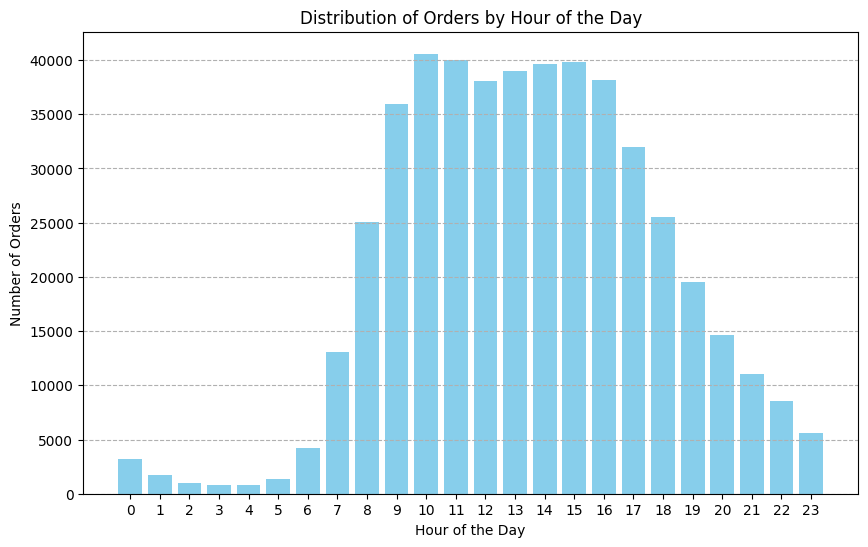

In [121]:
import matplotlib.pyplot as plt

order_hour_counts = instacart_orders_cleaned['order_hour_of_day'].value_counts().sort_index()
# group the data by 'order_hour_of_day' and count the number of orders for each hour

plt.figure(figsize=(10, 6))
plt.bar(order_hour_counts.index, order_hour_counts.values, color='skyblue') # show number of orders for each day
plt.xlabel('Hour of the Day') # x axis
plt.ylabel('Number of Orders') # y axis
plt.title('Distribution of Orders by Hour of the Day') # title
plt.xticks(range(0, 24))  # Set x-axis ticks to represent all 24 hours
plt.grid(axis='y', linestyle='--') # add grid lines along the y-axis
plt.show()

### Conclusion: Shopping Behavior by Hour of the Day

The data shows that the majority of grocery shopping takes place between 9 AM and 4 PM, with peak activity observed around midday. This suggests that customers prefer to shop during standard daytime hours, likely indicating a preference for managing groceries earlier in the day when they have more availability. This insight can help with optimizing delivery schedules and staffing for peak demand hours.

### [A3] What day of the week do people shop for groceries?

From the data, it’s evident that Sundays and Mondays are the most popular days for grocery shopping. It seems that customers prefer to restock their kitchens at the start of the week, perhaps after planning meals or noticing they’re running low after the weekend. This trend suggests that many shoppers use Instacart to kick off their week fully prepared.

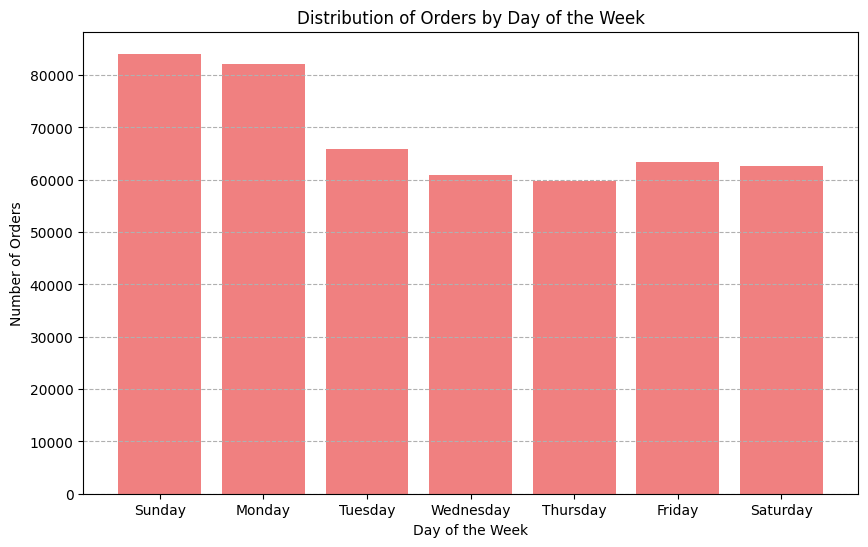

In [122]:
order_dow_counts = instacart_orders_cleaned['order_dow'].value_counts().sort_index() # group the data by 'order_dow' and count the number of orders

plt.figure(figsize=(10, 6)) # create a new figure for the plot with specified width and height
plt.bar(order_dow_counts.index, order_dow_counts.values, color='lightcoral') # plot a bar chart showing the number of orders for each day of the week
plt.xlabel('Day of the Week') # set the label for the x-axis as "Day of the Week"
plt.ylabel('Number of Orders') # set the label for the y-axis as "Number of Orders"
plt.title('Distribution of Orders by Day of the Week') # set the title of the plot to describe what it represents
plt.xticks(ticks=range(0, 7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']) # Set the x-axis tick labels to show the days of the week (0-6)
plt.grid(axis='y', linestyle='--') # add grid lines along the y-axis to make it easier to compare the heights of the bars
plt.show() # display the plot

# Plot the distribution of orders by day of the week


Conclusion: Shopping Behavior by Day of the Week

The analysis shows that the most popular shopping days are Sunday and Monday. This suggests that customers prefer to do their grocery shopping at the start of the week, likely to restock after the weekend. Understanding these peak shopping days helps in optimizing resource allocation such as inventory management, marketing campaigns, and staffing to better accommodate high customer activity on these days. Encouraging shopping on less busy days might also help balance the load for Instacart operations.

### [A4] How long do people wait until placing another order?

Our data reveals that customers tend to reorder groceries either on a weekly or monthly basis. The most frequent reorder intervals are within 7 days and 30 days, suggesting that many customers prefer to restock their groceries either every week or once a month. This trend highlights the convenience that Instacart offers for maintaining consistent grocery supplies, catering to both weekly planners and those with longer-term shopping habits.

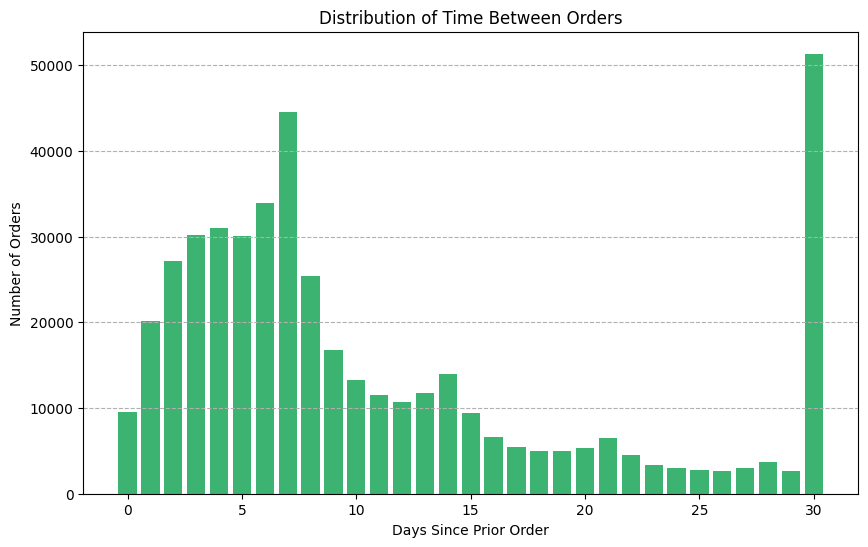

In [123]:
days_since_counts = instacart_orders_cleaned['days_since_prior_order'].value_counts().sort_index() # group the data by 'days_since_prior_order' and count the number of orders for each wait time

plt.figure(figsize=(10, 6)) # create plot with specified width and height
plt.bar(days_since_counts.index, days_since_counts.values, color='mediumseagreen') # plot a bar chart showing the number of orders based on days since the prior order
plt.xlabel('Days Since Prior Order') # set the label for the x-axis as "Days Since Prior Order"
plt.ylabel('Number of Orders') # set the label for the y-axis as "Number of Orders"
plt.title('Distribution of Time Between Orders') # set the title of the plot to describe what it represents
plt.grid(axis='y', linestyle='--') # add grid lines along the y-axis to make it easier to compare the heights of the bars
plt.show() # display the plot

# Plot the distribution of time between orders

### Conclusion: Time Between Orders

The analysis reveals that most customers place their next order either within 7 days or within 30 days. This indicates that there is a strong weekly and monthly shopping pattern among Instacart customers. Customers tend to either make weekly purchases to maintain a fresh supply of essentials or monthly purchases for bulk restocking. This insight can help Instacart focus on targeted marketing strategies such as weekly discounts for frequently purchased items or monthly subscription-like deals that cater to customers’ regular ordering habits. Understanding these cycles allows for more personalized engagement to retain customers and drive recurring orders.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

The 0 values probably correspond to customers who placed more than one order on the same day.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

Our analysis shows that Wednesdays and Saturdays have similar shopping patterns throughout most hours of the day. However, Saturdays see a noticeable surge in orders during the late morning to early afternoon, specifically between 11:00 AM and 3:00 PM. This peak suggests that many customers take advantage of the weekend to complete their grocery shopping during these hours, possibly due to increased availability and free time compared to weekdays.

In [124]:
import matplotlib.pyplot as plt

wednesday_orders = instacart_orders_cleaned[instacart_orders_cleaned['order_dow'] == 3]
saturday_orders = instacart_orders_cleaned[instacart_orders_cleaned['order_dow'] == 6]
# filter the data for Wednesdays and Saturdays

In [125]:
wednesday_hours = wednesday_orders['order_hour_of_day']
saturday_hours = saturday_orders['order_hour_of_day']
# get 'order_hour_of_day' for Wednesdays and Saturdays

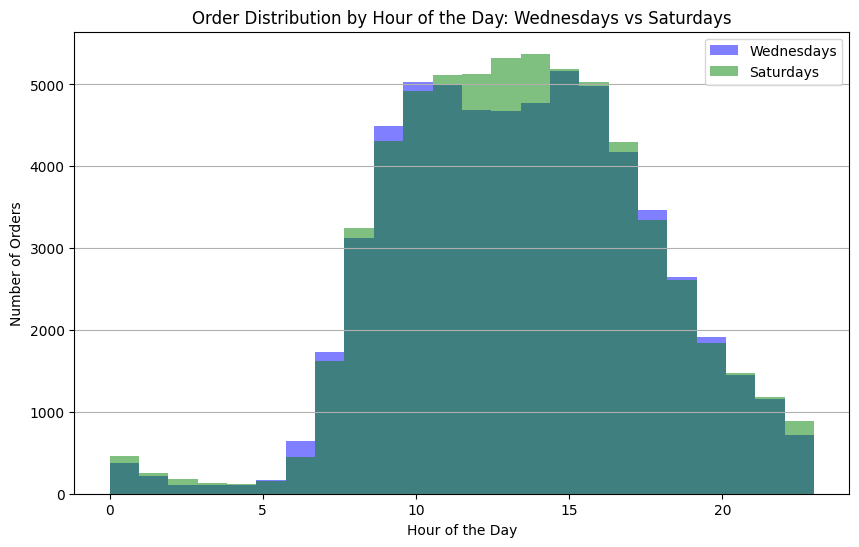

In [126]:
plt.figure(figsize=(10, 6)) # create plot with specified width and height
plt.hist(wednesday_hours, bins=24, alpha=0.5, label='Wednesdays', color='blue') # plot histogram for order hours on Wednesdays with 24 bins, color blue
plt.hist(saturday_hours, bins=24, alpha=0.5, label='Saturdays', color='green') # plot histogram for order hours on Saturdays with 24 bins,color green
plt.xlabel('Hour of the Day') # set the label for the x-axis as "Hour of the Day"
plt.ylabel('Number of Orders') # set the label for the y-axis as "Number of Orders"
plt.title('Order Distribution by Hour of the Day: Wednesdays vs Saturdays') #title of plot
plt.legend() #legend
plt.grid(axis='y') # add a grid to the plot for the y-axis to make the data easier to compare
plt.show() # display the plot

# Plot histograms for both Wednesdays and Saturdays

### Conclusion: Order Hour Distribution on Wednesdays vs Saturdays

The analysis shows that shopping patterns on Wednesdays and Saturdays are relatively similar throughout the day, but Saturdays have higher activity levels between 11 AM and 3 PM. This peak in shopping activity on Saturdays is likely due to customers taking advantage of their free time during weekends. In contrast, Wednesdays have a more consistent but slightly lower shopping volume throughout the day. Understanding these differences allows Instacart to prepare for higher order volumes during peak weekend hours by optimizing delivery resources and ensuring sufficient inventory levels to meet the increased demand.

### [B2] What's the distribution for the number of orders per customer? 

Our analysis shows that as the number of reorders increases, the number of customers decreases. This indicates that while many customers place a few orders, only a smaller group of loyal customers frequently reorder. This pattern highlights a core group of repeat shoppers who regularly use Instacart for their grocery needs, whereas most customers make only occasional purchases.

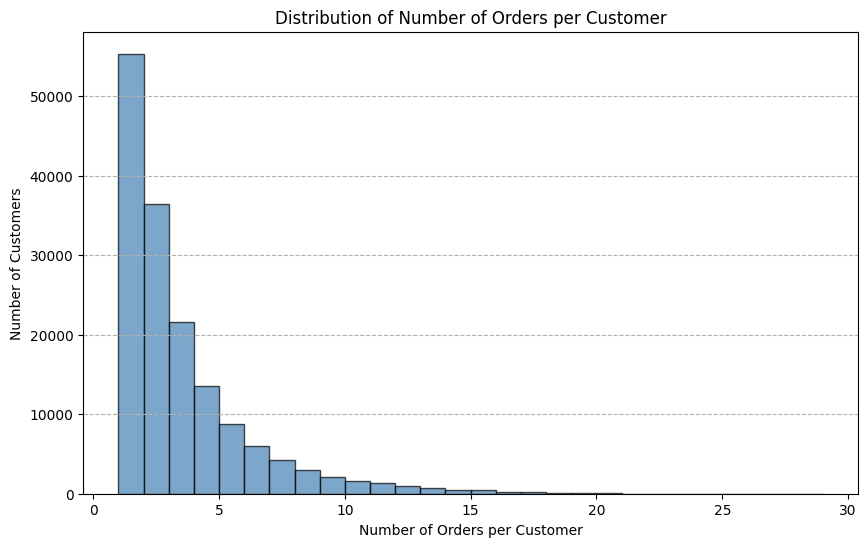

In [127]:
orders_per_customer = instacart_orders_cleaned['user_id'].value_counts() # group the data by 'user_id' and count the number of orders per customer

plt.figure(figsize=(10, 6)) # create plot with specified width and height
plt.hist(orders_per_customer, bins=range(1, orders_per_customer.max() + 2), color='steelblue', edgecolor='black', alpha=0.7) # plot a histogram showingthe number of orders per customer
plt.xlabel('Number of Orders per Customer') # set the label for the x-axis as "Number of Orders per Customer"
plt.ylabel('Number of Customers') # set the label for the y-axis as "Number of Customers"
plt.title('Distribution of Number of Orders per Customer') # set the title 
plt.grid(axis='y', linestyle='--') # add grid lines along the y-axis 
plt.show() # display the plot

### Conclusion: Number of Orders per Customer

The distribution shows that most customers have placed only a few orders, with a significant drop-off in the number of customers as the number of orders increases. This indicates that while Instacart has a large customer base, many customers are likely new or infrequent users. Encouraging repeat orders through loyalty programs or personalized incentives could help increase the number of customers making regular purchases. Identifying these patterns allows Instacart to focus on customer retention strategies to convert one-time shoppers into loyal customers.

### [B3] What are the top 20 popular products (display their id and name)?

In [128]:
product_counts = order_products_cleaned['product_id'].value_counts().head(20)
# group the data by 'product_id' and count the number of times each product was ordered

top_20_product_ids = product_counts.index
# get the top 20 product IDs

top_20_products = products_cleaned[products_cleaned['product_id'].isin(top_20_product_ids)]
# merge with products_cleaned DataFrame to get product names

top_20_products = top_20_products.merge(product_counts.rename('order_count'), left_on='product_id', right_index=True)
# merge to add the count of orders to the top_20_products DataFrame

print(top_20_products[['product_id', 'product_name', 'order_count']])
# Display the top 20 products (ID, name, and order count)

# What are the top 20 popular products (display their id and name)?

       product_id              product_name  order_count
5875         5876             organic lemon        12232
8276         8277  apple honeycrisp organic        11993
13175       13176    bag of organic bananas        53297
16796       16797              strawberries        20018
21136       21137      organic strawberries        37039
21902       21903      organic baby spinach        33971
22934       22935      organic yellow onion        15898
24851       24852                    banana        66050
24963       24964            organic garlic        15292
26208       26209                     limes        19690
27844       27845        organic whole milk        19600
27965       27966       organic raspberries        19197
28203       28204        organic fuji apple        12544
39274       39275       organic blueberries        13879
40705       40706    organic grape tomatoes        11781
45006       45007          organic zucchini        14584
47208       47209      organic 

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

Our analysis shows that customers most frequently purchase between 5 to 8 items per order. This peak suggests that many shoppers use Instacart for smaller, focused grocery runs rather than bulk buying. These typical order sizes might indicate regular restocking or purchasing for specific meals rather than larger monthly or bi-weekly trips.

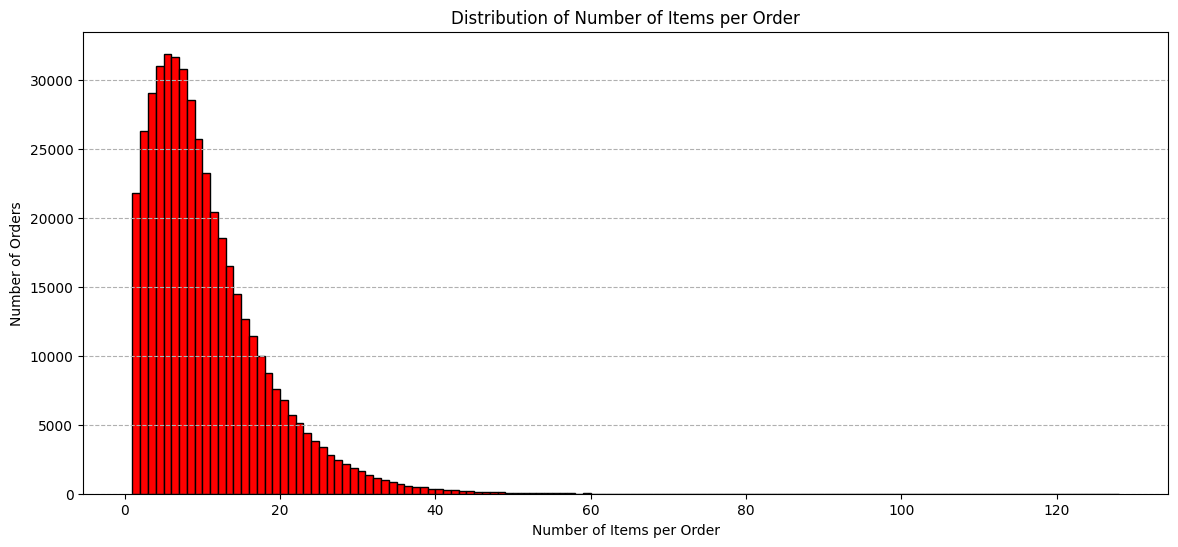

In [129]:
items_per_order = order_products_cleaned['order_id'].value_counts() # group the data by 'order_id' and count the number of items in each order

plt.figure(figsize=(14, 6)) # create a plot with specified width and height
plt.hist(items_per_order, bins=range(1, items_per_order.max() + 2), color='red', edgecolor='black') # plot a histogram showing the distribution of the number of items per order
plt.xlabel('Number of Items per Order') # set the label for the x-axis as "Number of Items per Order"
plt.ylabel('Number of Orders') # set the label for the y-axis as "Number of Orders"
plt.title('Distribution of Number of Items per Order') # Sst the title of the plot
plt.grid(axis='y', linestyle='--') # add grid lines along the y-axis 
plt.show() # display the plot

# Plot the distribution of number of items per order

### Conclusion: Number of Items per Order

The analysis indicates that most customers typically buy 5 to 8 items per order, with this range being the peak in the distribution. This suggests that many customers are using Instacart for smaller, more frequent trips rather than bulk shopping. These smaller orders could be driven by a need for quick restocking of essentials rather than a comprehensive grocery haul. Understanding this behavior allows Instacart to tailor its services, such as offering personalized recommendations for smaller baskets or incentivizing customers to add a few extra items to their cart to reach a certain threshold for discounts.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [130]:
reordered_products = order_products_cleaned[order_products_cleaned['reordered'] == 1]

# filter the data to include only reordered items

In [131]:
reordered_counts = reordered_products['product_id'].value_counts().head(20)

# group the data by 'product_id' and count the number of times each product was reordered

In [132]:
top_20_reordered_ids = reordered_counts.index

# Extract the top 20 product IDs for reordered items

In [133]:
top_20_reordered_products = products_cleaned[products_cleaned['product_id'].isin(top_20_reordered_ids)]

# merge with products_cleaned DataFrame to get product names for top 20 reordered products


In [134]:
top_20_reordered_products = top_20_reordered_products.merge(reordered_counts.rename('reorder_count'), left_on='product_id', right_index=True)

# merge to add the reorder count to the top_20_reordered_products DataFrame


In [135]:
print(top_20_reordered_products[['product_id', 'product_name', 'reorder_count']]) 

# display the top 20 reordered products (ID, name, and reorder count)

       product_id              product_name  reorder_count
5875         5876             organic lemon           8412
8276         8277  apple honeycrisp organic           8836
13175       13176    bag of organic bananas          44450
16796       16797              strawberries          13945
21136       21137      organic strawberries          28639
21902       21903      organic baby spinach          26233
22934       22935      organic yellow onion          11145
24851       24852                    banana          55763
24963       24964            organic garlic          10411
26208       26209                     limes          13327
27844       27845        organic whole milk          16251
27965       27966       organic raspberries          14748
28203       28204        organic fuji apple           8989
39274       39275       organic blueberries           8799
45006       45007          organic zucchini          10076
47208       47209      organic hass avocado          236

In [136]:
# What are the top 20 items that are reordered most frequently (display their names and product IDs)?

### [C3] For each product, what proportion of its orders are reorders?

In [137]:
total_orders_per_product = order_products_cleaned['product_id'].value_counts()

# group the data by 'product_id' to count the total number of orders for each product

In [138]:
reordered_per_product = order_products_cleaned[order_products_cleaned['reordered'] == 1]['product_id'].value_counts()

# filter for reordered items and group by 'product_id' to count the number of reorders for each product

In [139]:
reorder_proportion = (reordered_per_product / total_orders_per_product).fillna(0)

# calculate the proportion of reorders for each product

In [140]:
reorder_proportion_df = reorder_proportion.reset_index()
reorder_proportion_df.columns = ['product_id', 'reorder_proportion']

# convert the result to a DataFrame and reset the index

In [141]:
reorder_proportion_df = reorder_proportion_df.merge(products_cleaned[['product_id', 'product_name']], on='product_id')

# merge with products_cleaned DataFrame to get product names

In [142]:
print(reorder_proportion_df)

# Display the DataFrame with product ID, product name, and reorder proportion

       product_id  reorder_proportion  \
0               1            0.564286   
1               2            0.000000   
2               3            0.738095   
3               4            0.510204   
4               7            0.500000   
...           ...                 ...   
45568       49690            0.800000   
45569       49691            0.430556   
45570       49692            0.416667   
45571       49693            0.440000   
45572       49694            0.333333   

                                            product_name  
0                             chocolate sandwich cookies  
1                                       all-seasons salt  
2                   robust golden unsweetened oolong tea  
3      smart ones classic favorites mini rigatoni wit...  
4                         pure coconut water with orange  
...                                                  ...  
45568                      high performance energy drink  
45569                      original

In [143]:
# For each product, what proportion of its orders are reorders?

### [C4] For each customer, what proportion of their products ordered are reorders?

In [144]:
order_products_merged = order_products_cleaned.merge(instacart_orders_cleaned[['order_id', 'user_id']], on='order_id')

# merge 'order_products_cleaned' with 'instacart_orders_cleaned' to bring 'user_id' into the order data

In [145]:
total_products_per_customer = order_products_merged.groupby('user_id')['product_id'].count()

# group the data by 'user_id' to count the total number of products ordered by each customer

In [146]:
reordered_products_per_customer = order_products_merged[order_products_merged['reordered'] == 1].groupby('user_id')['product_id'].count()

# filter for reordered products and group by 'user_id' to count the number of reorders per customer

In [147]:
reorder_proportion_customer = (reordered_products_per_customer / total_products_per_customer).fillna(0)

# calculate the proportion of reorders for each customer

In [148]:
reorder_proportion_customer_df = reorder_proportion_customer.reset_index()
reorder_proportion_customer_df.columns = ['user_id', 'reorder_proportion']

# convert the result to a DataFrame and reset the index

In [149]:
print(reorder_proportion_customer_df)

        user_id  reorder_proportion
0             2            0.038462
1             4            0.000000
2             5            0.666667
3             6            0.000000
4             7            0.928571
...         ...                 ...
149621   206203            0.222222
149622   206206            0.714286
149623   206207            0.891304
149624   206208            0.696000
149625   206209            0.320000

[149626 rows x 2 columns]


In [150]:
# For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

In [151]:
first_items = order_products_cleaned[order_products_cleaned['add_to_cart_order'] == 1]

# filter the data to include only rows where 'add_to_cart_order' is 1

In [152]:
first_item_counts = first_items['product_id'].value_counts().head(20)

# group by 'product_id' to count the number of times each product was added to the cart first

In [153]:
top_20_first_item_ids = first_item_counts.index

# get the top 20 product IDs for items added first to the cart

In [154]:
top_20_first_items = products_cleaned[products_cleaned['product_id'].isin(top_20_first_item_ids)]

# merge with products_cleaned DataFrame to get product names for the top 20 first items

In [155]:
top_20_first_items = top_20_first_items.merge(first_item_counts.rename('first_add_count'), left_on='product_id', right_index=True)

# merge to add the count of first additions to the top_20_first_items DataFrame

In [156]:
print(top_20_first_items[['product_id', 'product_name', 'first_add_count']])

       product_id                 product_name  first_add_count
195           196                         soda             1733
5784         5785  organic reduced fat 2% milk             1310
12340       12341                hass avocados             1340
13175       13176       bag of organic bananas            11026
16796       16797                 strawberries             2308
19659       19660                 spring water             2336
21136       21137         organic strawberries             3946
21902       21903         organic baby spinach             3336
22934       22935         organic yellow onion             1246
24851       24852                       banana            15562
26208       26209                        limes             1370
27085       27086                  half & half             1309
27844       27845           organic whole milk             4363
27965       27966          organic raspberries             2024
38688       38689     organic reduced fa

### Project Conclusion: Instacart Customer Shopping Behavior Analysis

In this project, we explored various aspects of Instacart customer shopping behavior to gain insights into their preferences, shopping habits, and reorder patterns. By analyzing data on orders, products, and customer interactions, we uncovered several key findings:

1. Shopping Patterns by Day and Time: Customers tend to shop most frequently during midday hours, particularly between 9 AM and 4 PM. The most popular shopping days are Sundays and Mondays, indicating that customers prefer to restock their groceries at the beginning of the week. Saturdays also experience higher activity during 11 AM to 3 PM, likely due to increased free time during weekends.

2. Frequency of Orders: The distribution of the number of orders placed by each customer reveals that while many customers use Instacart for a few orders, fewer customers continue to place regular, frequent orders. This suggests that there is an opportunity to improve customer retention and encourage more frequent use through loyalty programs or targeted incentives.

3. Order Composition: The most typical order size contains 5 to 8 items, highlighting that Instacart is often used for smaller, targeted shopping trips rather than large, bulk purchases. This insight suggests that customers frequently use the service to restock essentials, which can be leveraged for targeted product recommendations or promotions encouraging larger baskets.

4. Reordering Behavior: Customers often reorder staple items, with products like bananas, milk, and eggs being among the most frequently reordered. This suggests that many customers use Instacart to restock regular essentials, which can be used to inform inventory management strategies and product recommendations.

5. Time Between Orders: The analysis shows that many customers place orders on a weekly or monthly basis, aligning with either weekly restocking of essentials or monthly bulk purchases. This provides an opportunity for Instacart to tailor marketing strategies to these predictable ordering cycles, encouraging more frequent purchasing behaviors.

6. Cart Behavior: The top 20 items that customers add to their carts first are typically essentials, reinforcing the importance of these products. Understanding these cart priorities can help with personalized promotions or featured product placements to encourage customers to fill their carts.

Overall, these insights provide a comprehensive understanding of customer shopping habits, from the frequency of their orders to their typical basket size and the times they prefer to shop. This knowledge can be utilized to improve operational efficiency, marketing strategies, and customer retention programs. By optimizing inventory based on peak shopping hours, tailoring promotions to restocking cycles, and encouraging larger basket sizes, Instacart can continue to enhance the customer experience and drive growth.

The key focus moving forward should be on improving customer loyalty and engagement, encouraging more frequent use, and capitalizing on the observed shopping patterns to deliver even more personalized and effective services.